# Performance Results Visualization

This notebook visualizes the performance benchmark results from `results.csv`. We will compare the performance of **single** vs. **sharded** modes across different scenarios, focusing on two key metrics:

1.  **Throughput (operations/second)**
2.  **Average Latency (ms)**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set a modern and appealing style for the plots
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8-talk')

## 1. Load and Prepare the Data

First, let's load the `results.csv` file into a pandas DataFrame and inspect the first few rows to ensure it's loaded correctly. We'll also perform a minor cleanup on the scenario names to make our chart labels cleaner.

In [3]:
# Load the dataset
try:
    df = pd.read_csv('results.csv')
except FileNotFoundError:
    print("Error: 'results.csv' not found. Please make sure the file is in the same directory as this notebook.")
    df = pd.DataFrame() # Create an empty dataframe to avoid further errors

# Clean up the scenario names for better plotting (e.g., 'baseline_light_run1' -> 'baseline_light')
if not df.empty:
    df['scenario'] = df['scenario_name'].str.replace('_run1', '')

    # Display the first few rows of the prepared data
    display(df.head())

,scenario_name,mode,shards,ops,concurrency,writeRatio,throughput_ops_s,writes,reads,errs,avgLatency_ms,timestamp,notes,scenario
0,baseline_light_run1,single,1,1000,10,0.5,2088.44,502,498,0,2.95,2025-10-05T04:11:20Z,NaN,baseline_light
1,baseline_light_run1,sharded,3,1000,10,0.5,5416.10,499,501,0,1.52,2025-10-05T04:11:34Z,NaN,baseline_light
2,typical_webapp_run1,single,1,10000,50,0.3,6391.98,2993,7007,0,5.87,2025-10-05T04:12:05Z,NaN,typical_webapp
3,typical_webapp_run1,sharded,3,10000,50,0.3,7312.09,2937,7063,0,5.25,2025-10-05T04:12:20Z,NaN,typical_webapp
4,read_heavy_cachelike_run1,single,1,10000,100,0.1,7983.53,987,9013,0,7.00,2025-10-05T04:12:51Z,NaN,read_heavy_cachelike


## 2. Throughput Comparison (Ops/Second)

Here, we'll create a bar chart to compare the throughput for each scenario. Higher throughput is better, indicating more operations can be handled per second.

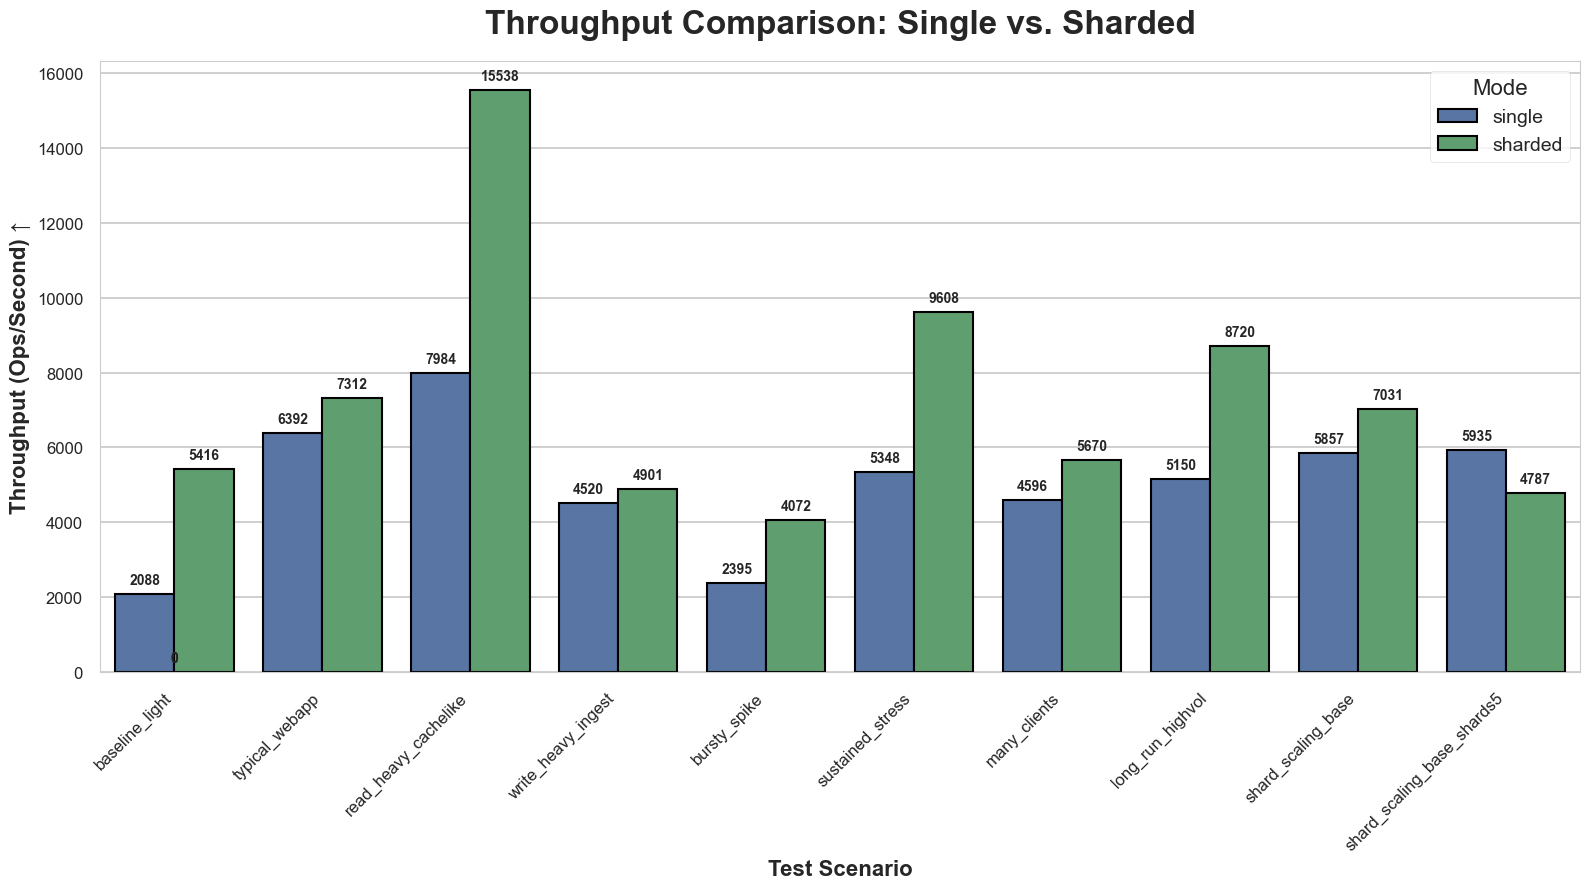

In [4]:
if not df.empty:
    plt.figure(figsize=(16, 9))

    # Create the bar plot
    ax = sns.barplot(
        data=df,
        x='scenario',
        y='throughput_ops_s',
        hue='mode',
        palette={'single': '#4c72b0', 'sharded': '#55a868'},
        edgecolor='black',
        linewidth=1.5
    )

    # Add value labels on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points',
                    fontweight='bold')

    # Customize the plot
    plt.title('Throughput Comparison: Single vs. Sharded', fontsize=24, fontweight='bold', pad=20)
    plt.ylabel('Throughput (Ops/Second) ↑', fontsize=16, fontweight='bold')
    plt.xlabel('Test Scenario', fontsize=16, fontweight='bold')
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(title='Mode', fontsize=14, title_fontsize=16)
    plt.tight_layout()

    # Show the plot
    plt.show()

### Analysis
The chart clearly shows that the **sharded** mode consistently delivers higher throughput across all scenarios. The performance gain is particularly significant in the `read_heavy_cachelike` and `baseline_light` scenarios.

## 3. Average Latency Comparison (ms)

Next, let's visualize the average latency. Lower latency is better, as it means requests are processed faster.

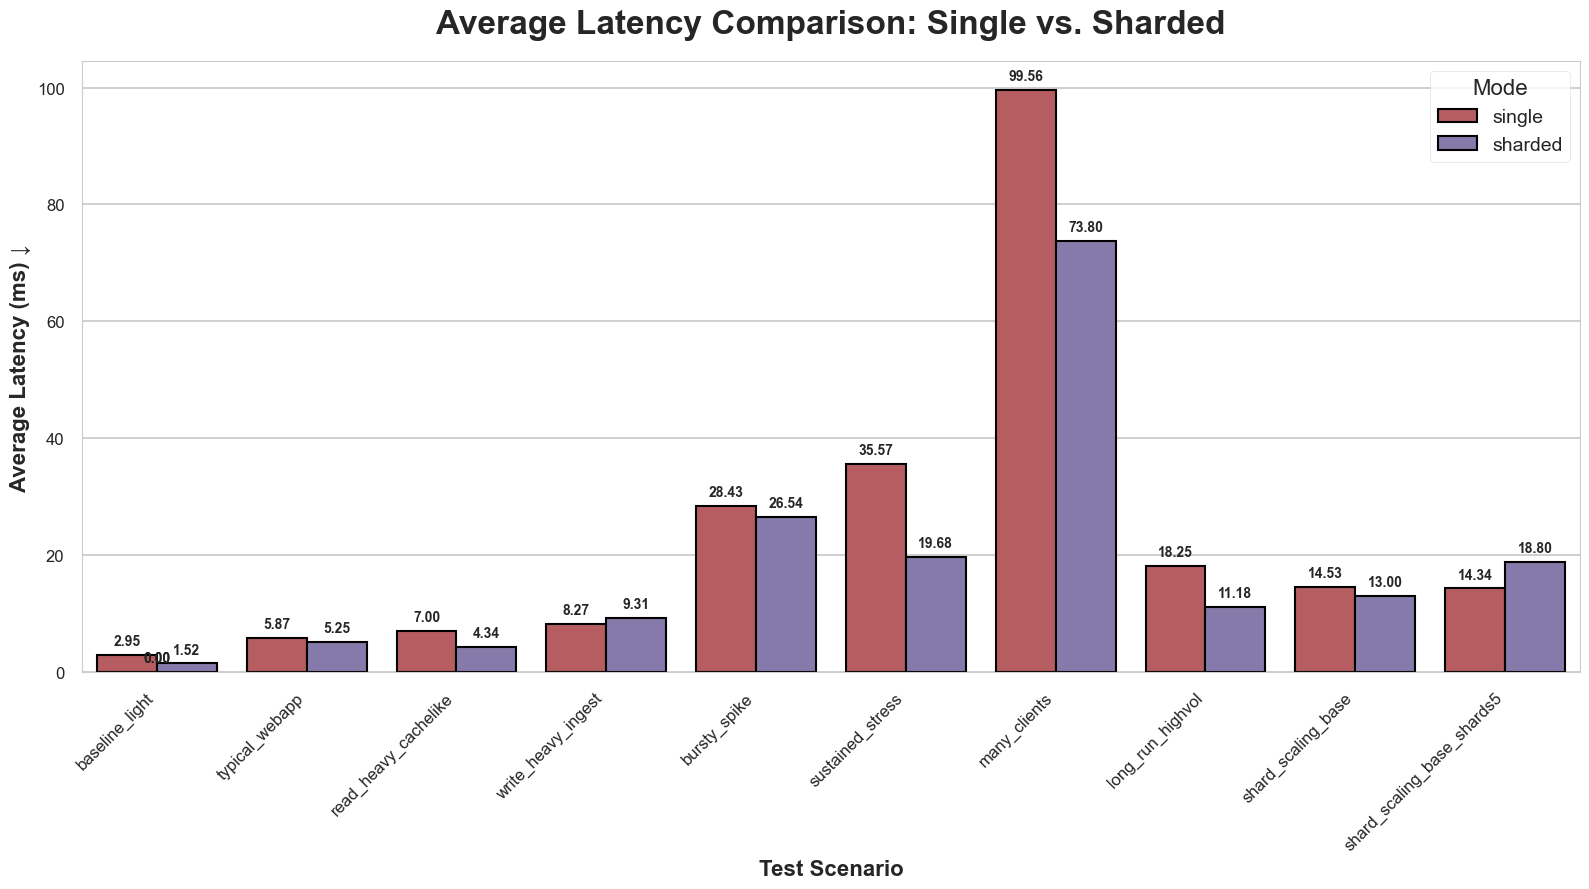

In [5]:
if not df.empty:
    plt.figure(figsize=(16, 9))
    
    # Create the bar plot
    ax = sns.barplot(
        data=df,
        x='scenario',
        y='avgLatency_ms',
        hue='mode',
        palette={'single': '#c44e52', 'sharded': '#8172b2'},
        edgecolor='black',
        linewidth=1.5
    )

    # Add value labels on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points',
                   fontweight='bold')
    
    # Customize the plot
    plt.title('Average Latency Comparison: Single vs. Sharded', fontsize=24, fontweight='bold', pad=20)
    plt.ylabel('Average Latency (ms) ↓', fontsize=16, fontweight='bold')
    plt.xlabel('Test Scenario', fontsize=16, fontweight='bold')
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(title='Mode', fontsize=14, title_fontsize=16)
    plt.tight_layout()

    # Show the plot
    plt.show()

### Analysis
Consistent with the throughput results, the **sharded** mode exhibits lower average latency in almost every scenario. This confirms that sharding not only increases capacity but also improves response times for individual operations.